In [1]:
%cd /rna/junyoung/prj/class/binfo1-work

/rna/junyoung/prj/class/binfo1-work


In [2]:
!featureCounts -a gencode.gtf -o read-counts.txt *.bam


        ==========     _____ _    _ ____  _____  ______          _____  
        =====         / ____| |  | |  _ \|  __ \|  ____|   /\   |  __ \ 
          =====      | (___ | |  | | |_) | |__) | |__     /  \  | |  | |
            ====      \___ \| |  | |  _ <|  _  /|  __|   / /\ \ | |  | |
              ====    ____) | |__| | |_) | | \ \| |____ / ____ \| |__| |
        ==========   |_____/ \____/|____/|_|  \_\______/_/    \_\_____/
	  v2.0.6

//========================== featureCounts setting ===========================\\
||                                                                            ||
||             Input files : 10 BAM files                                     ||
||                                                                            ||
||                           CLIP-35L33G.bam                                  ||
||                           CLIP-let7d.bam                                   ||
||                           CLIP-let7f-1.bam                    

In [3]:
import pandas as pd
cnts = pd.read_csv('read-counts.txt', sep='\t', comment='#', index_col=0)
cnts.head()

,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,CLIP-let7d.bam,CLIP-let7f-1.bam,CLIP-let7g.bam,filtered-RPF-siLuc.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam
Geneid,,,,,,,,,,,,,,,
ENSMUSG00000102693.2,chr1,3143476,3144545,+,1070,0,0,0,0,0,0,0,0,0,0
ENSMUSG00000064842.3,chr1,3172239,3172348,+,110,0,0,0,0,0,0,0,0,0,0
ENSMUSG00000051951.6,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3276124;3276746;3283662;3283832;3284705;349192...,3277540;3277540;3285855;3286567;3287191;349212...,-;-;-;-;-;-;-,6094,4,0,0,0,0,1,1,1,0,0
ENSMUSG00000102851.2,chr1,3322980,3323459,+,480,3,0,0,0,0,0,0,0,0,0
ENSMUSG00000103377.2,chr1,3435954,3438772,-,2819,0,0,0,0,0,0,0,0,0,0


In [16]:
cnts['clip_enrichment'] = cnts['CLIP-35L33G.bam'] / cnts['RNA-control.bam']
cnts['rden_change'] = (cnts['RPF-siLin28a.bam'] / cnts['RNA-siLin28a.bam']) / (cnts['RPF-siLuc.bam'] / cnts['RNA-siLuc.bam'])
print(len(cnts))
cnts.head()

55359


,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,CLIP-let7d.bam,CLIP-let7f-1.bam,CLIP-let7g.bam,filtered-RPF-siLuc.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,rden_change
Geneid,,,,,,,,,,,,,,,,,
ENSMUSG00000102693.2,chr1,3143476,3144545,+,1070,0,0,0,0,0,0,0,0,0,0,NaN,NaN
ENSMUSG00000064842.3,chr1,3172239,3172348,+,110,0,0,0,0,0,0,0,0,0,0,NaN,NaN
ENSMUSG00000051951.6,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3276124;3276746;3283662;3283832;3284705;349192...,3277540;3277540;3285855;3286567;3287191;349212...,-;-;-;-;-;-;-,6094,4,0,0,0,0,1,1,1,0,0,4.0,NaN
ENSMUSG00000102851.2,chr1,3322980,3323459,+,480,3,0,0,0,0,0,0,0,0,0,inf,NaN
ENSMUSG00000103377.2,chr1,3435954,3438772,-,2819,0,0,0,0,0,0,0,0,0,0,NaN,NaN


In [5]:
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats

cnts = pd.read_csv('read-counts.txt', sep='\t', comment='#', index_col=0)
len(cnts)

55359

In [15]:
readcounts = 10
cnts_sorted = cnts.loc[(cnts['CLIP-35L33G.bam'] > readcounts) &
                (cnts['RNA-control.bam'] > readcounts) &
                (cnts['RNA-siLin28a.bam'] > readcounts) &
                (cnts['RNA-siLuc.bam'] > readcounts) &
                (cnts['RPF-siLin28a.bam'] > readcounts) &
                (cnts['RPF-siLuc.bam'] > readcounts)] 
print(len(cnts_sorted))
cnts_sorted.head()

10944


,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,CLIP-let7d.bam,CLIP-let7f-1.bam,CLIP-let7g.bam,filtered-RPF-siLuc.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam
Geneid,,,,,,,,,,,,,,,
ENSMUSG00000103922.2,chr1,4841354,4842422,+,1069,183,0,0,0,74,95,93,100,42,75
ENSMUSG00000033845.14,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4843429;4843434;4844659;4846600;4847748;484774...,4844739;4847024;4844739;4847024;4847871;484787...,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;...,8487,4014,0,0,0,3,1355,3022,2563,1859,3191
ENSMUSG00000025903.15,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4878011;4878046;4878053;4878119;4878121;487813...,4878205;4878205;4878205;4878205;4878205;487820...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,7145,2045,0,0,0,44,574,1219,1236,33,44
ENSMUSG00000033813.16,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4928037;4928261;4937693;4937693;4948250;494825...,4928199;4928726;4937755;4937755;4948355;494835...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+,3017,1658,0,0,0,607,762,2130,2225,328,609
ENSMUSG00000033793.13,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,5140241;5153303;5153333;5153347;5153355;515335...,5140367;5153501;5153848;5153501;5153501;515350...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,9746,1111,0,0,0,1121,474,1260,1031,603,1128


In [7]:
cnt_clip_tpm = (cnts_sorted['CLIP-35L33G.bam'])/(sum(((cnts_sorted['CLIP-35L33G.bam']/cnts_sorted['Length'])))*(cnts_sorted['Length']))
cnt_RNA_ctrl_tpm = (cnts_sorted['RNA-control.bam'])/(sum(((cnts_sorted['RNA-control.bam']/cnts_sorted['Length'])))*(cnts_sorted['Length']))
cnt_RPF_siLin28a_tpm = (cnts_sorted['RPF-siLin28a.bam'])/(sum(((cnts_sorted['RPF-siLin28a.bam']/cnts_sorted['Length'])))*(cnts_sorted['Length']))
cnt_RNA_siLin28a_tpm = (cnts_sorted['RNA-siLin28a.bam'])/(sum(((cnts_sorted['RNA-siLin28a.bam']/cnts_sorted['Length'])))*(cnts_sorted['Length']))
cnt_RPF_siLuc_tpm = (cnts_sorted['RPF-siLuc.bam'])/(sum(((cnts_sorted['RPF-siLuc.bam']/cnts_sorted['Length'])))*(cnts_sorted['Length']))
cnt_RNA_siLuc_tpm = (cnts_sorted['RNA-siLuc.bam'])/(sum(((cnts_sorted['RNA-siLuc.bam']/cnts_sorted['Length'])))*(cnts_sorted['Length']))

In [8]:
cnts_sorted['clip_enrichment'] = cnt_clip_tpm/cnt_RNA_ctrl_tpm
cnts_sorted['rden_change'] = (cnt_RPF_siLin28a_tpm/cnt_RNA_siLin28a_tpm)/(cnt_RPF_siLuc_tpm/cnt_RNA_siLuc_tpm)
cnts_sorted

/tmp/ipykernel_479494/4011647431.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cnts_sorted['clip_enrichment'] = cnt_clip_tpm/cnt_RNA_ctrl_tpm
/tmp/ipykernel_479494/4011647431.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cnts_sorted['rden_change'] = (cnt_RPF_siLin28a_tpm/cnt_RNA_siLin28a_tpm)/(cnt_RPF_siLuc_tpm/cnt_RNA_siLuc_tpm)


,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,CLIP-let7d.bam,CLIP-let7f-1.bam,CLIP-let7g.bam,filtered-RPF-siLuc.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,rden_change
Geneid,,,,,,,,,,,,,,,,,
ENSMUSG00000103922.2,chr1,4841354,4842422,+,1069,183,0,0,0,74,95,93,100,42,75,0.709446,0.887728
ENSMUSG00000033845.14,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4843429;4843434;4844659;4846600;4847748;484774...,4844739;4847024;4844739;4847024;4847871;484787...,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;...,8487,4014,0,0,0,3,1355,3022,2563,1859,3191,1.091013,0.728419
ENSMUSG00000025903.15,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4878011;4878046;4878053;4878119;4878121;487813...,4878205;4878205;4878205;4878205;4878205;487820...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,7145,2045,0,0,0,44,574,1219,1236,33,44,1.312119,1.121116
ENSMUSG00000033813.16,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4928037;4928261;4937693;4937693;4948250;494825...,4928199;4928726;4937755;4937755;4948355;494835...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+,3017,1658,0,0,0,607,762,2130,2225,328,609,0.801349,0.829434
ENSMUSG00000033793.13,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,5140241;5153303;5153333;5153347;5153355;515335...,5140367;5153501;5153848;5153501;5153501;515350...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,9746,1111,0,0,0,1121,474,1260,1031,603,1128,0.863232,0.644868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSMUSG00000064351.1,chrM,5328,6872,+,1545,533,0,0,0,17213,16638,50576,39430,21253,17355,0.011798,1.407514
ENSMUSG00000064363.1,chrM,10167,11544,+,1378,373,0,0,0,2411,2150,5028,4224,3292,2498,0.063894,1.632190
ENSMUSG00000064367.1,chrM,11742,13565,+,1824,3665,0,0,0,4764,5281,15549,17408,5986,5305,0.255593,1.862398


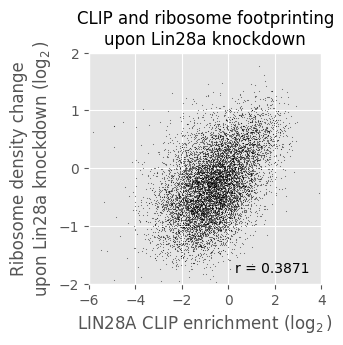

In [9]:
plt.style.use('ggplot')
fig, ax = plt.subplots(1, 1, figsize=(3, 3))
ax.scatter(np.log2(cnts_sorted['clip_enrichment']),
           np.log2(cnts_sorted['rden_change']), alpha = 0.5, color='black', s=0.1)
ax.set_xlabel(r'LIN28A CLIP enrichment ($\log_2$)')
ax.set_ylabel('Ribosome density change\n'+ r'upon Lin28a knockdown ($\log_2$)')
ax.set_title('CLIP and ribosome footprinting\nupon Lin28a knockdown', fontsize = 12)
corr = stats.pearsonr(cnts_sorted['clip_enrichment'],cnts_sorted['rden_change'])
ax.annotate(f'r = {corr[0]:.4f}', xy=(0.95, 0.05), xycoords='axes fraction', ha='right')
ax.set_ylim(-2,2)
ax.set_xlim(-6,4)
ax.set_yticks([-2,-1,.0,1,2])
None

In [10]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
mouselocal = pd.read_csv('https://hyeshik.qbio.io/binfo/mouselocalization-20210507.txt', sep='\t')
mouselocal.head()

,gene_id,Gene names,type
0,ENSMUSG00000000001,Gnai3,cytoplasm
1,ENSMUSG00000000028,Cdc45 Cdc45l Cdc45l2,nucleus
2,ENSMUSG00000000049,Apoh B2gp1,cytoplasm
3,ENSMUSG00000000058,Cav2,cytoplasm
4,ENSMUSG00000000085,Scmh1,nucleus


In [11]:
cnts_sorted['gene_id'] = cnts_sorted.index.str.split('.').str[0].copy()
cnts_sorted

/tmp/ipykernel_479494/752368477.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cnts_sorted['gene_id'] = cnts_sorted.index.str.split('.').str[0].copy()


,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,CLIP-let7d.bam,CLIP-let7f-1.bam,CLIP-let7g.bam,filtered-RPF-siLuc.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,rden_change,gene_id
Geneid,,,,,,,,,,,,,,,,,,
ENSMUSG00000103922.2,chr1,4841354,4842422,+,1069,183,0,0,0,74,95,93,100,42,75,0.709446,0.887728,ENSMUSG00000103922
ENSMUSG00000033845.14,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4843429;4843434;4844659;4846600;4847748;484774...,4844739;4847024;4844739;4847024;4847871;484787...,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;...,8487,4014,0,0,0,3,1355,3022,2563,1859,3191,1.091013,0.728419,ENSMUSG00000033845
ENSMUSG00000025903.15,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4878011;4878046;4878053;4878119;4878121;487813...,4878205;4878205;4878205;4878205;4878205;487820...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,7145,2045,0,0,0,44,574,1219,1236,33,44,1.312119,1.121116,ENSMUSG00000025903
ENSMUSG00000033813.16,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4928037;4928261;4937693;4937693;4948250;494825...,4928199;4928726;4937755;4937755;4948355;494835...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+,3017,1658,0,0,0,607,762,2130,2225,328,609,0.801349,0.829434,ENSMUSG00000033813
ENSMUSG00000033793.13,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,5140241;5153303;5153333;5153347;5153355;515335...,5140367;5153501;5153848;5153501;5153501;515350...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,9746,1111,0,0,0,1121,474,1260,1031,603,1128,0.863232,0.644868,ENSMUSG00000033793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSMUSG00000064351.1,chrM,5328,6872,+,1545,533,0,0,0,17213,16638,50576,39430,21253,17355,0.011798,1.407514,ENSMUSG00000064351
ENSMUSG00000064363.1,chrM,10167,11544,+,1378,373,0,0,0,2411,2150,5028,4224,3292,2498,0.063894,1.632190,ENSMUSG00000064363
ENSMUSG00000064367.1,chrM,11742,13565,+,1824,3665,0,0,0,4764,5281,15549,17408,5986,5305,0.255593,1.862398,ENSMUSG00000064367


In [12]:
cnts_merge = pd.merge(cnts_sorted, mouselocal)
print(len(cnts_merge))
cnts_merge.head()

4965


,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,CLIP-let7d.bam,CLIP-let7f-1.bam,CLIP-let7g.bam,filtered-RPF-siLuc.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,rden_change,gene_id,Gene names,type
0,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4878011;4878046;4878053;4878119;4878121;487813...,4878205;4878205;4878205;4878205;4878205;487820...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,7145,2045,0,0,0,44,574,1219,1236,33,44,1.312119,1.121116,ENSMUSG00000025903,Lypla1 Apt1 Pla1a,cytoplasm
1,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,6276421;6276451;6284869;6284887;6285232;629382...,6276494;6276494;6285181;6285181;6285476;629396...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,14690,1520,0,0,0,251,280,694,903,132,251,1.999298,1.008796,ENSMUSG00000025907,Rb1cc1 Cc1 Kiaa0203,nucleus
2,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,7159144;7159154;7159328;7159390;7190418;721786...,7159440;7159440;7159440;7159440;7190839;721796...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,6654,3508,0,0,0,137,529,2360,1775,208,138,2.442282,1.671265,ENSMUSG00000051285,Pcmtd1,cytoplasm
3,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,10094826;10095068;10097328;10097328;10097423;1...,10095288;10095288;10097476;10097476;10097476;1...,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;...,3766,1058,0,0,0,1,866,1748,1563,680,1424,0.449945,0.629493,ENSMUSG00000025917,Cops5 Csn5 Jab1 Kic2,nucleus
4,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,10108212;10108231;10108442;10108451;10108474;1...,10109567;10108355;10108569;10108569;10108569;1...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,17553,2278,0,0,0,603,435,1273,1093,407,604,1.928663,0.852951,ENSMUSG00000056763,Cspp1 Cspp,cytoplasm


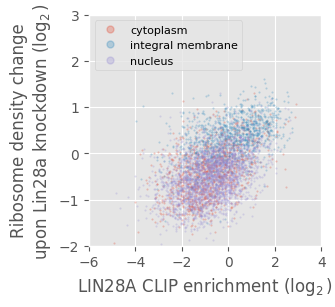

In [13]:
plt.style.use('ggplot')
fig, ax = plt.subplots(1, 1, figsize=(3, 3))

groups = cnts_merge.groupby('type')
for name, group in groups:
    ax.plot(np.log2(group.clip_enrichment),
            np.log2(group.rden_change),
            marker='.',
            linestyle='',
            label=name,
            alpha=0.3,
            markersize=1
            )
ax.legend(fontsize='8', loc='upper left',markerscale=10)
ax.set_xlabel(r'LIN28A CLIP enrichment ($\log_2$)')
ax.set_ylabel('Ribosome density change\n'+ r'upon Lin28a knockdown ($\log_2$)')
ax.set_ylim(-2,3)
ax.set_xlim(-6,4)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(True)
None